## Mount google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## List files


In [2]:
import os

directory_path = "/content/drive/MyDrive/ds_bhavya kumar/needed/csv_files"
file_list = os.listdir(directory_path)
print(file_list)

['fear_greed_index.csv', 'historical_data.csv']


## Load data


In [3]:
import pandas as pd

directory_path = "/content/drive/MyDrive/ds_bhavya kumar/needed/csv_files"
historical_data_path = os.path.join(directory_path, "historical_data.csv")
fear_greed_index_path = os.path.join(directory_path, "fear_greed_index.csv")

historical_data_df = pd.read_csv(historical_data_path)
fear_greed_index_df = pd.read_csv(fear_greed_index_path)

display(historical_data_df.head())
display(fear_greed_index_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
fear_greed_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


## Merge dataframes


In [6]:
historical_data_df['Timestamp'] = pd.to_datetime(historical_data_df['Timestamp'], unit='ms').dt.date
fear_greed_index_df['date'] = pd.to_datetime(fear_greed_index_df['date']).dt.date

merged_df = pd.merge(historical_data_df, fear_greed_index_df, left_on='Timestamp', right_on='date', how='inner')

display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27,1730007000,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27,1730007000,74,Greed,2024-10-27


## Display merged data


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           184263 non-null  object 
 1   Coin              184263 non-null  object 
 2   Execution Price   184263 non-null  float64
 3   Size Tokens       184263 non-null  float64
 4   Size USD          184263 non-null  float64
 5   Side              184263 non-null  object 
 6   Timestamp IST     184263 non-null  object 
 7   Start Position    184263 non-null  float64
 8   Direction         184263 non-null  object 
 9   Closed PnL        184263 non-null  float64
 10  Transaction Hash  184263 non-null  object 
 11  Order ID          184263 non-null  int64  
 12  Crossed           184263 non-null  bool   
 13  Fee               184263 non-null  float64
 14  Trade ID          184263 non-null  float64
 15  Timestamp         184263 non-null  object 
 16  timestamp         18

In [8]:
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27,1730007000,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27,1730007000,74,Greed,2024-10-27


In [9]:
display(merged_df.tail())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,value,classification,date
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.13,551.77,BUY,18-04-2025 20:03,-1797.88,Close Short,-82.883731,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-02-19,1739943000,44,Fear,2025-02-19
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,7.50,1002.00,BUY,18-04-2025 20:03,-1793.75,Close Short,-150.515250,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-02-19,1739943000,44,Fear,2025-02-19
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,3.93,525.05,BUY,18-04-2025 20:03,-1786.25,Close Short,-78.869991,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-02-19,1739943000,44,Fear,2025-02-19
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.34,579.82,BUY,18-04-2025 20:03,-1782.32,Close Short,-87.098158,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-02-19,1739943000,44,Fear,2025-02-19
184262,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,1777.98,237538.13,BUY,18-04-2025 20:03,-1777.98,Close Short,-35681.747230,0x77cd8bc91ee6e2f1429c0421c9a82a02077d0041becd...,87333347541,False,23.753812,4.030000e+14,2025-02-19,1739943000,44,Fear,2025-02-19


In [10]:
merged_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


### VISUALIZATION

In [11]:
sampled_df = merged_df.sample(n=5000)
sampled_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,value,classification,date
136441,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,13.290,5.83000,77.48,SELL,10-12-2024 11:35,55359.202180,Sell,-0.273367,0x00000000000000000000000000000000000000000000...,54196765929,False,0.000000,5.880000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
155193,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,19.200,366.28000,7032.58,BUY,03-03-2025 13:01,0.005613,Buy,0.000000,0xb68c3a7ab4335ae734ee041ed060480201640095c776...,76455871776,False,0.018314,7.750000e+14,2025-02-19,1739943000,44,Fear,2025-02-19
156501,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,15.243,17.71000,269.95,BUY,07-03-2025 03:18,1887.760000,Open Long,0.000000,0x9df58192804b72295cd4041f0b25690202db00e7ac12...,77760880263,True,0.080986,5.900000e+14,2025-02-19,1739943000,44,Fear,2025-02-19
177566,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,HYPE,23.159,85.41000,1978.01,BUY,19-01-2025 18:26,18934.280000,Open Long,0.000000,0x04623d8642fe1a4f4b84041bd7c14c01de00a0adb05b...,64361626697,True,0.692303,1.110000e+15,2025-02-19,1739943000,44,Fear,2025-02-19
111544,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,SOL,235.780,2.79000,657.83,SELL,26-11-2024 14:53,29.790000,Close Long,2.601396,0xb7ec4c1eac3a0efe089f0417bec70001ac006cda975f...,50432966835,True,0.230239,4.300000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141326,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,25.410,9.61000,244.19,SELL,19-12-2024 13:17,17482.660210,Sell,2.101522,0x00000000000000000000000000000000000000000000...,56547337351,False,0.012209,6.250000e+14,2024-10-27,1730007000,74,Greed,2024-10-27
18635,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,92599.000,0.45000,41669.55,SELL,10-01-2025 05:39,1.304840,Close Long,209.835000,0x2da500e252d0052c570f041b149cd701e600d93d789c...,61915786832,True,12.500864,5.470000e+14,2025-02-19,1739943000,44,Fear,2025-02-19
128262,0xb899e522b5715391ae1d4f137653e7906c5e2115,SOL,133.210,66.72000,8887.77,BUY,04-03-2025 22:05,1117.740000,Open Long,0.000000,0xcfbbbb83b78f0580263c041ee6b29b0205e700977c1f...,77109312048,True,2.986290,4.290000e+14,2025-02-19,1739943000,44,Fear,2025-02-19
96259,0x8477e447846c758f5a675856001ea72298fd9cb5,BTC,76167.000,0.00015,11.43,BUY,07-04-2025 11:53,0.279560,Open Long,0.000000,0xb507b0e512f5d1939c2604211055f40206fd007c1f5a...,84507929516,True,0.003998,4.750000e+14,2025-02-19,1739943000,44,Fear,2025-02-19


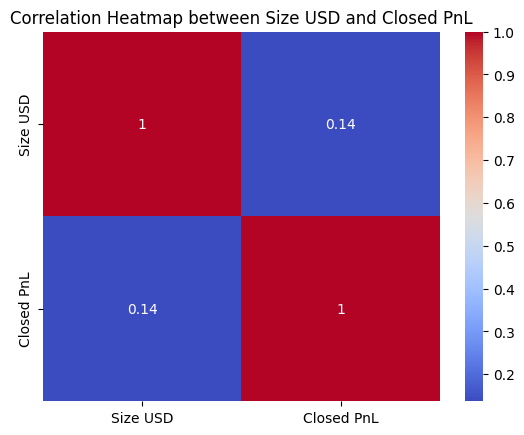

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
corr_data = numeric_df[['Size USD', 'Closed PnL']]

corr_matrix=corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Size USD and Closed PnL')
plt.show()

In [13]:
grouped_data = merged_df.groupby(['Coin', 'classification'])['Size USD'].mean().reset_index()
display(grouped_data)

,Coin,classification,Size USD
0,@1,Fear,66.085556
1,@1,Greed,122.676800
2,@10,Neutral,9.327500
3,@100,Greed,10.667500
4,@103,Fear,0.000000
...,...,...,...
432,kPEPE,Greed,885.270277
433,kPEPE,Neutral,623.484762
434,kSHIB,Extreme Greed,1250.390000
435,kSHIB,Fear,3056.165714


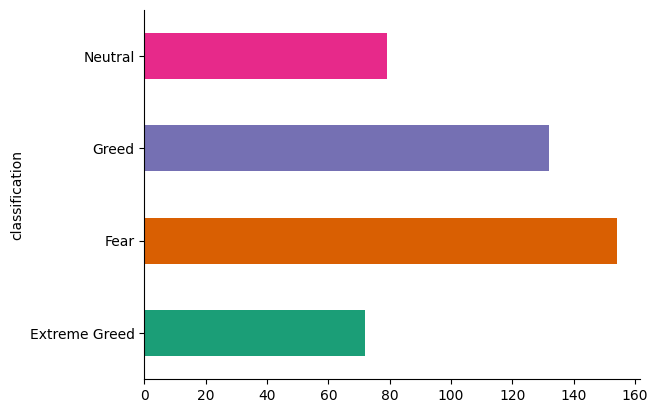

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
grouped_data.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1376562793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(grouped_data, x='Size USD', y='classification', inner='stick', palette='Dark2')


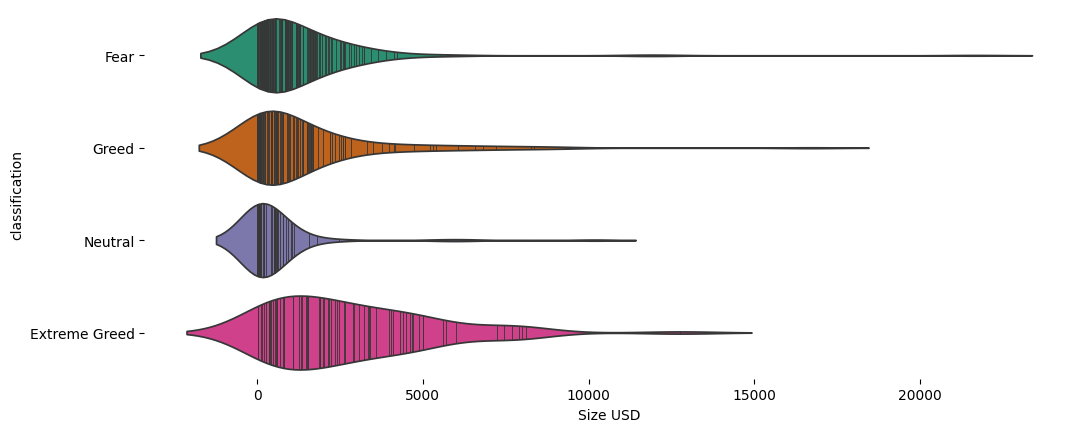

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(grouped_data['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped_data, x='Size USD', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [16]:
merged_df.groupby('classification')[['Size USD', 'Closed PnL']].mean()

,Size USD,Closed PnL
classification,,
Extreme Greed,5660.265764,25.418772
Fear,5259.977837,50.047622
Greed,3182.883845,87.894859
Neutral,3058.848110,22.229713


In [17]:
da=merged_df.groupby('classification')[['Size USD', 'Closed PnL']].mean()

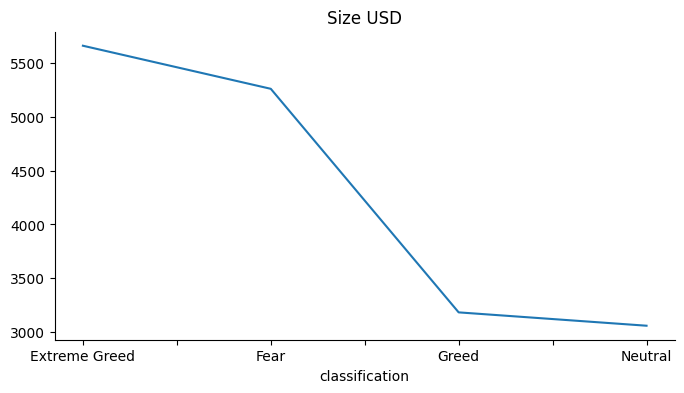

In [18]:
from matplotlib import pyplot as plt
da['Size USD'].plot(kind='line', figsize=(8, 4), title='Size USD')
plt.gca().spines[['top', 'right']].set_visible(False)

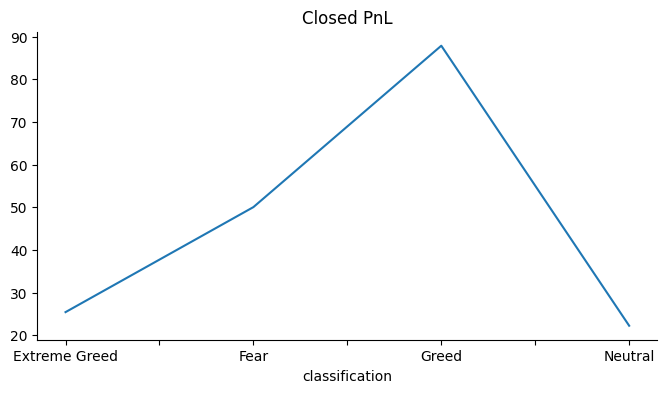

In [19]:
from matplotlib import pyplot as plt
da['Closed PnL'].plot(kind='line', figsize=(8, 4), title='Closed PnL')
plt.gca().spines[['top', 'right']].set_visible(False)